In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2.,1.,4.]])
#M = np.array([[3,-1,-1],[3.,-1.,-1.],[2.,1.,4.]])
b = np.array([1.,3.,7.])
print(M)
print(b)

[[ 3. -1. -1.]
 [-1.  3.  1.]
 [ 2.  1.  4.]]
[1. 3. 7.]


$$ \huge x_{i}^{k+1} = \frac{1}{a_{ii}}( b_{i} - \sum_{i \neq j} a_{ij}x_{j}^{k} ), i = 1,2,3,... $$

In [3]:
def GetGaussSeidel(M,bv,x0,itmax = 10000,error = 1e-10):
    
    M_, N_ = M.shape
    x = x0
    
    r = np.linalg.norm( bv - np.dot(M,x) )
    it = 0
    
    while r > error and it < itmax:
        
        it += 1
        
        for i in range(M_):
            
            sum_ = 0.
            
            for j in range(N_):
                
                if i != j:
                    sum_ += M[i,j]*x[j]
                    
            x[i] = (bv[i] - sum_)/M[i,i]
            
        print(x)
        r = np.linalg.norm( bv - np.dot(M,x) )
    print(r) 
    return x,r,it

In [4]:
x0 = np.array([20,-10.,10.])
r,_,it = GetGaussSeidel(M,b,x0)
print(it)
print(r)

[ 0.33333333 -2.22222222  2.13888889]
[0.30555556 0.38888889 1.5       ]
[0.96296296 0.82098765 1.0632716 ]
[0.96141975 0.96604938 1.02777778]
[0.99794239 0.99005487 1.00351509]
[0.99785665 0.99811385 1.00154321]
[0.99988569 0.99944749 1.00019528]
[0.99988093 0.99989521 1.00008573]
[0.99999365 0.99996931 1.00001085]
[0.99999338 0.99999418 1.00000476]
[0.99999965 0.99999829 1.0000006 ]
[0.99999963 0.99999968 1.00000026]
[0.99999998 0.99999991 1.00000003]
[0.99999998 0.99999998 1.00000001]
[1.         0.99999999 1.        ]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
3.9632747730761344e-11
19
[1. 1. 1.]


In [5]:
#np.linalg.solve(M,b)

In [6]:
def GetTMatrix(M):
    
    M_, N_ = M.shape
    
    D = np.zeros_like(M)
    R = D.copy()
    T = D.copy()
    
    for i in range(M_):
        for j in range(N_):
            if i == j:
                D[i,j] = 1/M[i,j]
            else:
                R[i,j] = M[i,j]
                
    T = np.dot(D,R)
    return T

In [7]:
T = GetTMatrix(M)
print(T)

[[ 0.         -0.33333333 -0.33333333]
 [-0.33333333  0.          0.33333333]
 [ 0.5         0.25        0.        ]]


In [8]:
values, vectors = np.linalg.eig(T)
re = np.amax(np.abs(values))
print(re)

0.33333333333333315


In [9]:
x = np.linspace(0.,2.,20) 
y = np.linspace(0.,2.,20)
X,Y = np.meshgrid(x,y)

In [10]:
Z1 = (b[0] - M[0,0]*X - M[0,1]*Y)/M[0,2]
Z2 = (b[1] - M[1,0]*X - M[1,1]*Y)/M[1,2]
Z3 = (b[2] - M[2,0]*X - M[2,1]*Y)/M[2,2]

<IPython.core.display.Javascript object>


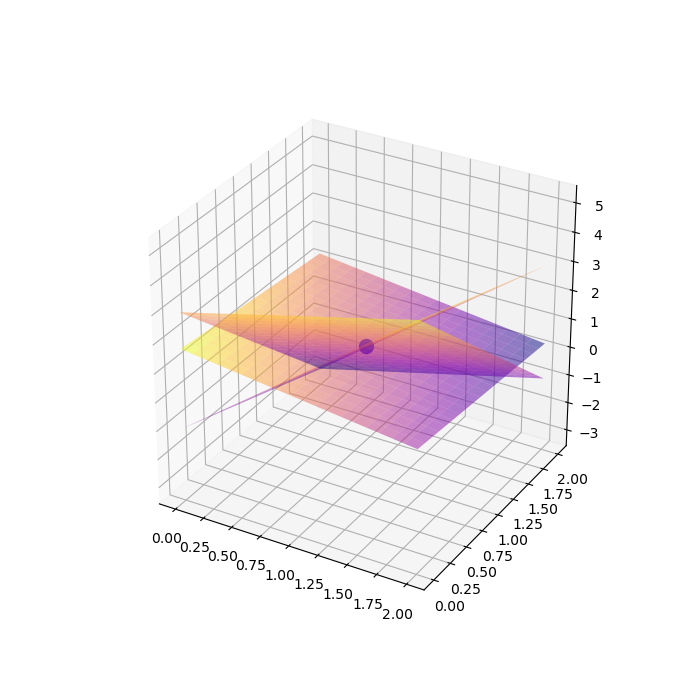

In [12]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z1, cmap=cm.plasma, alpha=0.5)
ax.plot_surface(X,Y,Z2, cmap=cm.plasma, alpha=0.5)
ax.plot_surface(X,Y,Z3, cmap=cm.plasma, alpha=0.5)
ax.scatter(r[0],r[1],r[1], color='b' ,marker = 'o', s=100 ) 
plt.show()